In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
digi_data = pd.read_csv('data/digikala-orders.csv')
digi_data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [59]:
# Convert the 'DateTime_CartFinalize' column to datetime format
digi_data['DateTime_CartFinalize'] = pd.to_datetime(digi_data['DateTime_CartFinalize'])

# Add mounth column
digi_data['Month'] = digi_data['DateTime_CartFinalize'].dt.to_period('M')

digi_data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,Month
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,2015-10
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,2018-02
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,2016-06
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,2018-09
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,2016-05
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01,344037.0,تهران,2.0,2018-04
199996,4425393,3745774,131645,2016-07-09 19:14:09,600000.0,محمدیه,1.0,2016-07
199997,6671889,4845514,215045,2017-03-08 23:47:06,450000.0,اصفهان,1.0,2017-03
199998,6315995,2541418,264021,2017-02-08 14:59:39,193486.0,همدان,1.0,2017-02


In [60]:
orders_per_month = digi_data.groupby('Month')['ID_Order'].nunique().reset_index()

orders_per_month

,Month,ID_Order
0,2013-09,6
1,2013-10,73
2,2013-11,90
3,2013-12,116
4,2014-01,140
...,...,...
59,2018-08,5950
60,2018-09,6458
61,2018-10,5485
62,2018-11,5933


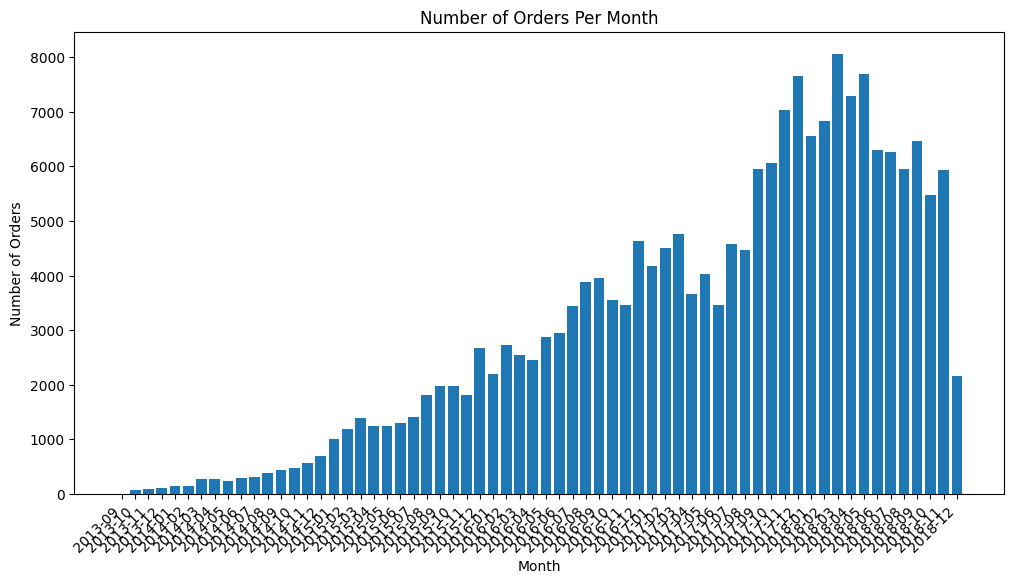

In [61]:
plt.figure(figsize=(12, 6))
plt.bar(orders_per_month['Month'].to_numpy(dtype=str), orders_per_month['ID_Order'].to_numpy())
plt.title('Number of Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()


In [62]:
# Group the data by city and count the number of customer in per city
customer_per_city = digi_data.groupby('city_name_fa')['ID_Customer'].nunique().reset_index()

customer_per_city

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


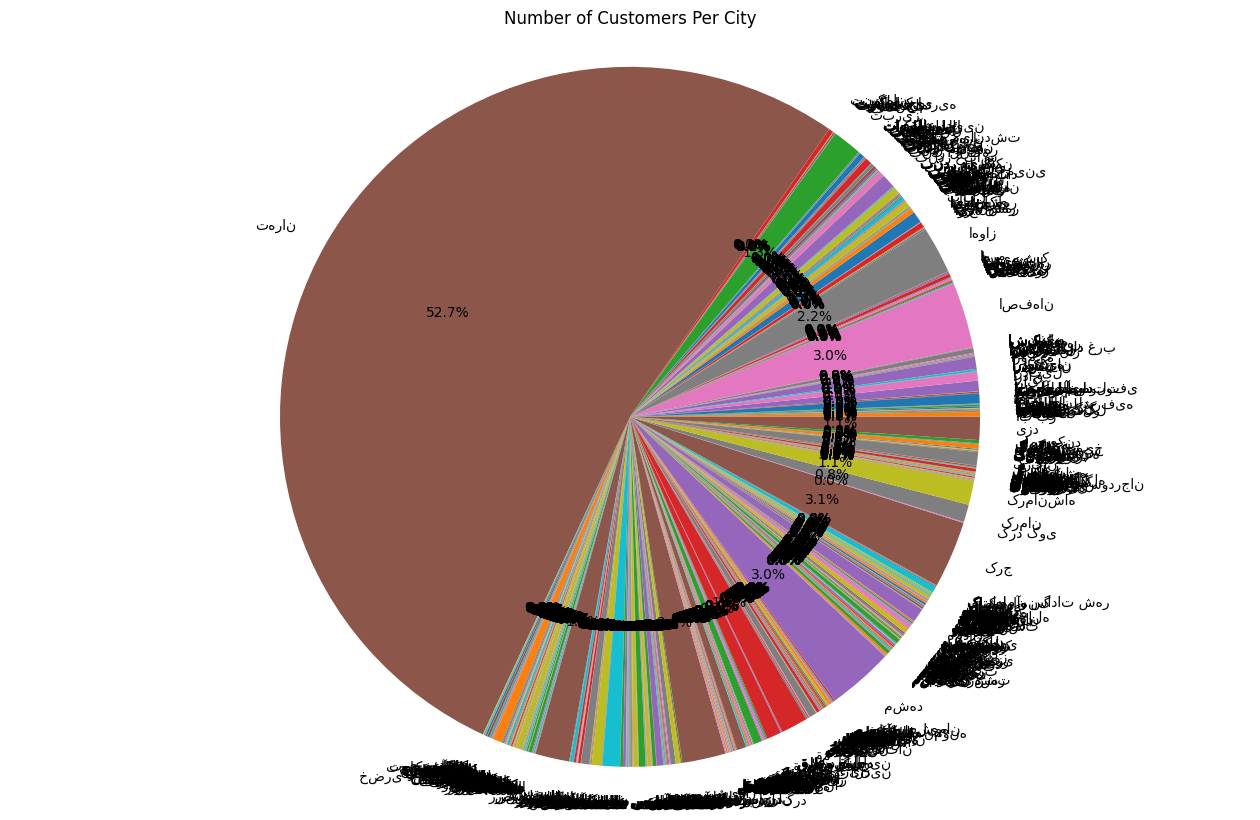

In [63]:
plt.figure(figsize=(16, 10))
plt.pie(customer_per_city['ID_Customer'], labels=customer_per_city['city_name_fa'], autopct='%1.1f%%')
plt.title('Number of Customers Per City')
plt.axis('equal')
plt.show()